<a href="https://colab.research.google.com/github/aayushi-29/VCET-DS/blob/main/SampleD_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ML-CLASSIFICATION***

In [ ]:
#1. logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

logr=LogisticRegression()

df=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

x = df.drop('Loan_ID', axis=1)
x = x.drop('Property_Area', axis=1)
y = df['Property_Area']

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using the mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()

# Replace 'X' with the intended variable, for example 'X_train'
print(X_train.head())  # Print the first few rows of X_train

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
80     Male     Yes         3+      Graduate            No             3829   
88     Male      No          2  Not Graduate            No             3235   
224  Female      No          2      Graduate           Yes             5184   
326    Male     Yes          1  Not Graduate           NaN             2600   
186    Male     Yes          2  Not Graduate            No             4521   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  
80                1103       163.0             360.0             0.0  
88                2015        77.0             360.0             1.0  
224                  0       187.0             360.0             0.0  
326                618       122.0             360.0             1.0  
186               1184       150.0             360.0             1.0  


In [ ]:
#2. Naive Bayes Classifier
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for categorical features

nb=GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.4)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Handle missing values in numerical columns
imputer_numeric = SimpleImputer(strategy='mean') # Use mean imputation for numerical columns
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

nb.fit(X_train_imputed,y_train)

y_pred1=nb.predict(X_test_imputed)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))

Naive Bayes:  0.29931972789115646


In [ ]:
# 3. KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder to handle categorical data

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

train=knn.fit(X_train_imputed,y_train) # Train on the imputed data

y_pred=knn.predict(X_test_imputed) # Predict on the imputed data

print('KNN:',accuracy_score(y_test,y_pred))

KNN: 0.30434782608695654


In [ ]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for categorical features

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Train the Decision Tree on the imputed and encoded data
train=dt.fit(X_train_imputed,y_train)

y_pred=dt.predict(X_test_imputed)

print('Decision Tree:',accuracy_score(y_test,y_pred))

Decision Tree: 0.32432432432432434


In [ ]:
# 5. Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for categorical features

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Train the Random Forest on the imputed and encoded data
train=rf.fit(X_train_imputed,y_train)

y_pred=rf.predict(X_test_imputed)

print('Random Forest:',accuracy_score(y_test,y_pred))

Random Forest: 0.2882882882882883


In [ ]:
# 6. Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder to handle categorical data

gbm=GradientBoostingClassifier(n_estimators=10)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Now fit the model after handling NaNs and categorical data
gbm.fit(X_train_imputed,Y_train)

y_pred=gbm.predict(X_test_imputed)

print("GBM: ",accuracy_score(Y_test,y_pred))

GBM:  0.4189189189189189


# ***DATA ENGINEEERING***

In [ ]:
import pandas as pd

df=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

X = df.drop('Loan_ID', axis=1)
X = X.drop('Property_Area', axis=1)
Y = df['Property_Area']
print(X)
print(Y)

    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Male     Yes          0      Graduate            No             5720   
1     Male     Yes          1      Graduate            No             3076   
2     Male     Yes          2      Graduate            No             5000   
3     Male     Yes          2      Graduate            No             2340   
4     Male      No          0  Not Graduate            No             3276   
..     ...     ...        ...           ...           ...              ...   
362   Male     Yes         3+  Not Graduate           Yes             4009   
363   Male     Yes          0      Graduate            No             4158   
364   Male      No          0      Graduate            No             3250   
365   Male     Yes          0      Graduate            No             5000   
366   Male      No          0      Graduate           Yes             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_imputed_numeric = imputer_numeric.fit_transform(X[numeric_cols])

# Handle categorical features with OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_imputed_categorical = encoder.fit_transform(X[categorical_cols]).toarray()

# Combine imputed numeric and encoded categorical data
X_imputed = np.hstack((X_imputed_numeric, X_imputed_categorical))

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_imputed, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)  # Use original column names for clarity
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                Specs         Score
0              Gender   2912.114065
1             Married  13251.474891
2          Dependents      6.961605
3           Education      1.805635
4       Self_Employed      0.309634
5     ApplicantIncome      1.657732
6   CoapplicantIncome      0.671347
7          LoanAmount      1.040404
8    Loan_Amount_Term      0.259859
9      Credit_History      0.149447
10                NaN      0.149431
11                NaN      0.367792
12                NaN      1.692833
13                NaN      3.211204
14                NaN      2.434399
15                NaN      0.157012
16                NaN      0.528982
17                NaN      0.955219
18                NaN      5.997807
19                NaN      0.234821


[0.04592037 0.04586614 0.09044252 0.03234388 0.04099797 0.24561763
 0.16526803 0.2199058  0.05994673 0.05369093]


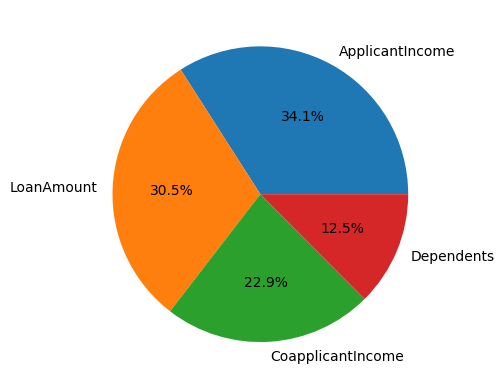

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

model.fit(X_encoded,Y) # Fit the model with encoded features
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [ ]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


df['ApplicantIncome']=pd.cut(df['ApplicantIncome'],3,labels=['0','1','2'])
df['CoapplicantIncome']=pd.cut(df['CoapplicantIncome'],3,labels=['0','1','2'])
df['LoanAmount']=pd.cut(df['LoanAmount'],3,labels=['0','1','2'])
df['Loan_Amount_Term']=pd.cut(df['Loan_Amount_Term'],3,labels=['0','1','2'])

print(df)

X = df.drop('Loan_ID', axis=1)
X = X.drop('Property_Area', axis=1)
Y = df['Property_Area']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)


      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

    ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term  \
0                 0                 0          0                2   
1        

In [ ]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

[2 2 2 2 2 2 1 0 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2 0 2 2 1 2 1 2 1 2 2 1 2
 2 2 2 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 0 1 1 1 1 2 1 0 2 1 1 1 1 0 1 1 2 0
 1 2 2 0 1 2 2 2 0 0 1 0 2 1 1 0 0 0 1 1 1 1 2 1 2 1 0 1 2 0 1 1 2 0 1 2 1
 1 2 1 0 1 1 0 2 0 2 0 2 0 2 1 2 2 2 1 2 0 0 2 2 2 0 0 1 1 0 0 2 1 0 2 1 0
 1 2 2 2 0 2 0 1 2 0 1 0 0 1 2 0 0 1 2 2 1 0 0 0 0 2 0 0 2 0 0 2 1 1 2 0 2
 1 1 1 0 0 0 2 0 0 1 2 1 0 2 0 0 2 2 1 1 1 1 1 2 0 2 0 1 0 0 2 1 0 0 2 2 0
 2 0 1 2 2 0 0 2 1 2 0 1 2 2 1 0 1 2 2 1 1 0 1 1 2 2 1 0 2 1 1 2 2 0 0 2 0
 0 1 1 0 0 0 1 2 0 0 0 2 0 1 1 1 1 2 1 1 1 1 0 2 0 2 2 0 0 2 2 1 2 0 2 2 1
 1 0 1 0 2 2 0 0 1 1 0 0 0 1 2 0 2 0 2 1 0 2 0 2 0 2 2 1 0 1 1 2 0 1 0 2 2
 1 1 2 2 2 0 0 1 0 0 2 0 2 0 2 2 0 0 0 2 0 1 2 2 2 0 1 2 1 2 2 1 0 0]


In [ ]:
#Dealing with missing values

print(df.isnull().sum())

df['ApplicantIncome'].fillna(df['ApplicantIncome'].mode()[0], inplace=True)

# If there are missing values in categorical columns like 'Property_Area', you can impute them:
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
import pandas as pd

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    # Imputing numerical values (choose one method: mean, median, or mode)
    # Method: Mean
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
#Oversampling and Under Sampling

print(df.isnull().sum())
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mode()[0], inplace=True)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
# Fill any remaining NaNs in the entire DataFrame X before applying SMOTE
X = X.fillna(X.mode().iloc[0]) # Fill NaNs with the mode of each column
X, Y=sms.fit_resample(X,Y) # Now X should not contain NaNs

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Counter({2: 140, 1: 116, 0: 111})
Counter({2: 140, 1: 140, 0: 140})


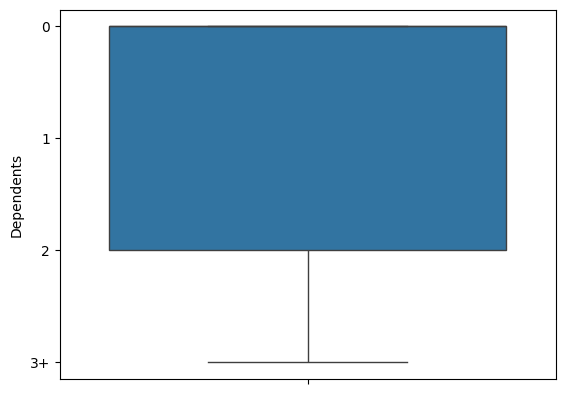

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Dependents'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range

# Convert 'ApplicantIncome' to numeric, coercing errors to NaN
df['ApplicantIncome'] = pd.to_numeric(df['ApplicantIncome'], errors='coerce')

# Drop rows with NaN in 'ApplicantIncome' if needed
df.dropna(subset=['ApplicantIncome'], inplace=True)

print(df['ApplicantIncome'])
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['ApplicantIncome'] < lower].values
out2=df[df['ApplicantIncome'] > upper].values

df['ApplicantIncome'].replace(out1,lower,inplace=True)
df['ApplicantIncome'].replace(out2,upper,inplace=True)

print(df['ApplicantIncome'])

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: ApplicantIncome, Length: 367, dtype: int64
0.0
0.0
0.0
0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: ApplicantIncome, Length: 367, dtype: int64


In [ ]:
import pandas as pd

# Ensure 'LoanAmount' is numeric
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')

# Specify the column name you want to print
print(df['LoanAmount']) # Replace 'LoanAmount' with the actual column name

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1
print("IQR:", IQR)

# Determine upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper bound:", upper)
print("Lower bound:", lower)

# Identify outliers
out1 = df['LoanAmount'] < lower
out2 = df['LoanAmount'] > upper

# Replace outliers with respective bounds
df.loc[out1, 'LoanAmount'] = lower
df.loc[out2, 'LoanAmount'] = upper

print(df['LoanAmount'])

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
362    0.0
363    0.0
364    0.0
365    0.0
366    0.0
Name: LoanAmount, Length: 367, dtype: float64
IQR: 0.0
Upper bound: 0.0
Lower bound: 0.0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
362    0.0
363    0.0
364    0.0
365    0.0
366    0.0
Name: LoanAmount, Length: 367, dtype: float64


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")  # Replace with your actual file path

# Identify categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

# Apply Label Encoding to convert categorical features to numerical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Separate features and target variable
X = df.drop(['Loan_ID', 'Property_Area'], axis=1)
Y = df['Property_Area']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

print(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

# Initialize and train the logistic regression model
logr = LogisticRegression(max_iter=1000, solver='lbfgs')
logr.fit(X_train, y_train)

# Make predictions
y_pred = logr.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))


[[ 1.01776141e+03 -1.50465797e+03]
 [-1.72102825e+03 -1.85790594e+02]
 [ 1.78883503e+02  2.43387897e+02]
 [-2.52588093e+03  8.08177788e+02]
 [-1.42084806e+03 -1.66919906e+03]
 [-2.75910978e+03  1.67071391e+03]
 [-2.46856358e+03 -1.73992037e+03]
 [-8.16816566e+02 -1.62811256e+03]
 [ 8.91370602e+03 -9.71533223e+02]
 [-2.45605698e+03  6.66679463e+02]
 [-1.60535363e+03 -1.68157021e+03]
 [-2.61085405e+03 -2.29535989e+02]
 [-5.33108355e+02 -1.60956919e+03]
 [ 7.45635792e+03 -1.07037874e+03]
 [-3.37473604e+01 -1.57545633e+03]
 [ 9.65008271e+02 -1.50810003e+03]
 [-3.12299831e+02  1.32875357e+03]
 [-9.34130560e+02 -1.30238276e+03]
 [ 3.98427905e+03  6.63016586e+03]
 [-3.62567513e+03  1.66013210e+03]
 [-2.91485596e+03 -1.46408967e+02]
 [-2.61142258e+03 -1.74971732e+03]
 [-7.89156083e+02 -1.62649706e+03]
 [-9.32683453e+02 -1.63604128e+03]
 [ 4.04870734e+02  2.84488003e+03]
 [-6.30373905e+03  2.20561661e+04]
 [-4.20063170e+02 -3.48590404e+02]
 [ 2.54237270e+03  2.35745115e+03]
 [-9.82153468e+02 -8

# ***VIZUALIZATION***

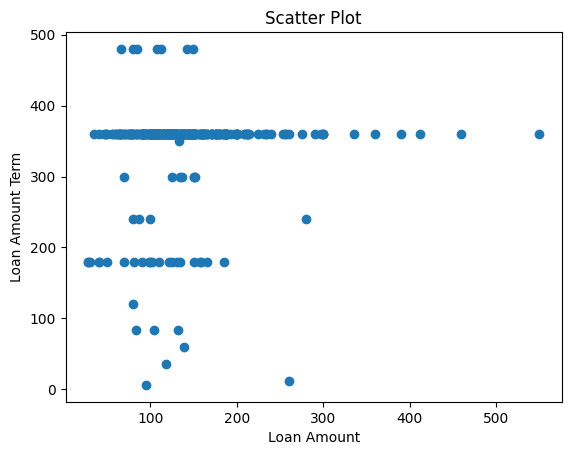

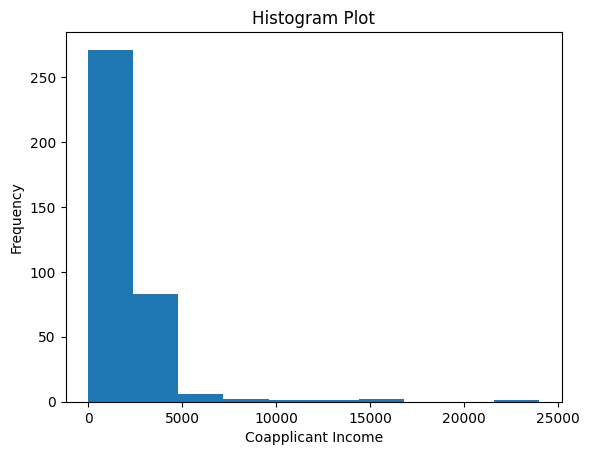

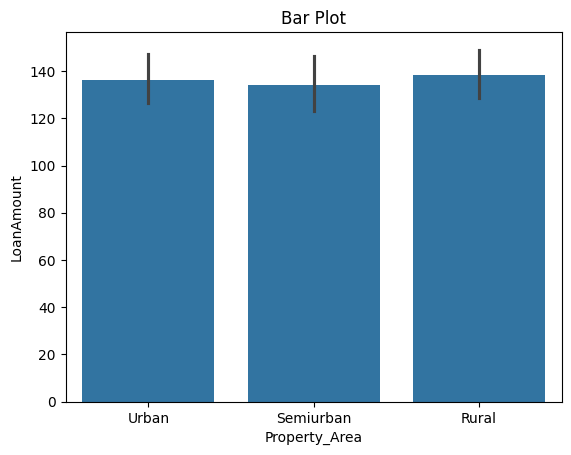

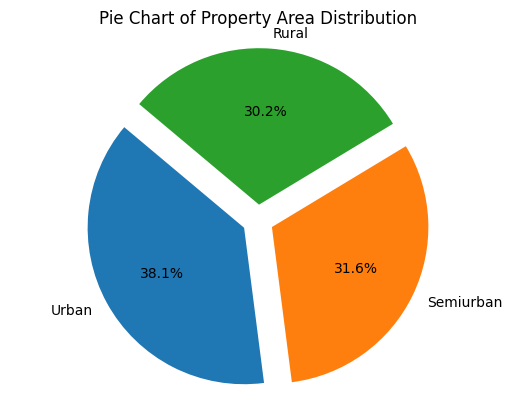

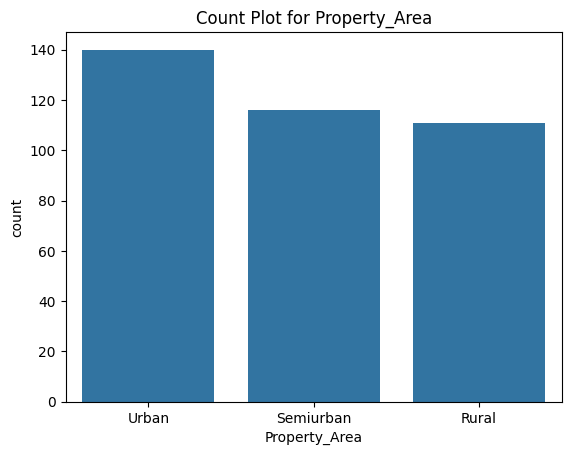

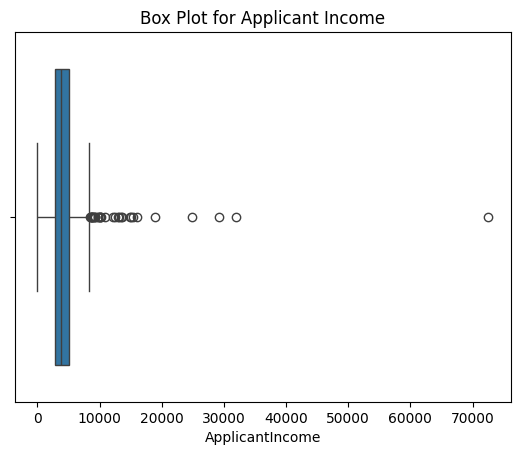

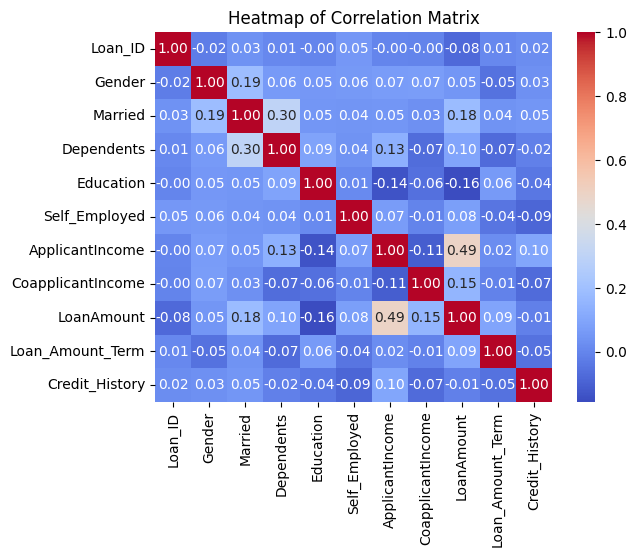

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

# Preparing X and Y
X = df.drop(['Loan_ID', 'Property_Area'], axis=1)
Y = df['Property_Area']

# Scatter Plot to find correlations between two continuous variables
plt.scatter(df["LoanAmount"], df["Loan_Amount_Term"])
plt.title("Scatter Plot")
plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.show()

# Histogram shows the distribution of a continuous variable
plt.hist(df["CoapplicantIncome"])
plt.title("Histogram Plot")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.show()

# Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="Property_Area", y="LoanAmount", data=df)
plt.title("Bar Plot")
plt.show()

# Pie Chart to show the distribution of Property_Area
property_area_counts = df['Property_Area'].value_counts()
property_area_labels = property_area_counts.index
sizes = property_area_counts.values

plt.pie(sizes, labels=property_area_labels, autopct='%1.1f%%', startangle=140, explode=[0.1] * len(sizes))
plt.title("Pie Chart of Property Area Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

# Count Plot to show the count of occurrences for each category of Property_Area.
sns.countplot(x='Property_Area', data=df)
plt.title("Count Plot for Property_Area")
plt.show()

# Box Plot showing the distribution of ApplicantIncome.
sns.boxplot(x='ApplicantIncome', data=df)  # if x horizontal and if y vertical
plt.title("Box Plot for Applicant Income")
plt.show()

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Calculate correlation matrix only for numerical columns
numerical_df = df.drop('Property_Area', axis=1)  # Remove the 'Property_Area' column
correlation_matrix = numerical_df.corr()  # Calculate correlations


# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()
